In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Merged_File_v7_skin_clean_location.xlsx')
df['Location'] = df['Location'].str.strip()
df.loc[df['Location'].eq('Faro') & df['Screening_date'].eq('2022-08-13'), 'Screening_date'] = '2022-08-14'
df.loc[df['Location'].eq('Lisboa') & df['Screening_date'].eq('2023-05-15'), 'Screening_date'] = '2023-05-19'

df.head()

,Location,Screening_date,Gender,Age,Personal_cancer_history,Family_cancer_history,Sun_exposure,Body_signs,Phototype,Skin_diagnosis
0,Abrantes,2022-07-23,f,53.0,n,y,y,y,2.0,2.0
1,Abrantes,2022-07-23,f,35.0,n,y,y,y,3.0,2.0
2,Abrantes,2022-07-23,f,47.0,n,y,n,n,3.0,1.0
3,Abrantes,2022-07-23,f,54.0,n,y,n,y,4.0,1.0
4,Abrantes,2022-07-23,f,71.0,y,y,n,y,3.0,2.0


In [6]:
d1 = df.groupby(['Location', 'Screening_date'], as_index=False).size().sort_values(['Location', 'Screening_date'])
d2 = d1.assign(count = d1.groupby(['Location'])['Location'].transform('count'))
print(d2['count'].ne(1))

0     False
1      True
2      True
3      True
4      True
      ...  
94     True
95     True
96    False
97     True
98     True
Name: count, Length: 99, dtype: bool


In [7]:
d2 = d2[d2['count'].ne(1)]

d2['ndays'] = d2.groupby('Location')['Screening_date'].diff()
d2['nscreens'] = d2['size'].values/d2['ndays'].dt.days
d2

,Location,Screening_date,size,count,ndays,nscreens
1,Abrantes,2022-07-23,95,4,NaT,NaN
2,Abrantes,2022-10-01,101,4,70 days,1.442857
3,Abrantes,2023-06-29,103,4,271 days,0.380074
4,Abrantes,2023-12-02,101,4,156 days,0.647436
5,Albufeira,2023-01-21,40,2,NaT,NaN
6,Albufeira,2023-04-22,101,2,91 days,1.109890
7,Alcanena,2022-07-05,96,2,NaT,NaN
8,Alcanena,2023-06-15,92,2,345 days,0.266667
10,Alcácer do Sal,2022-10-29,81,2,NaT,NaN
11,Alcácer do Sal,2023-11-11,99,2,378 days,0.261905


In [8]:
date_range = pd.date_range(start='2022-03-03', end='2024-04-20') #datas mais extremas no dataset

datesdf = pd.DataFrame(date_range, columns=['Screening_date'])

list_dfs = []

groups = d2.groupby('Location')

for _, group in groups:
    list_dfs.append(datesdf.merge(group, how='left').bfill().ffill())

d3 = pd.concat(list_dfs)
d3

,Screening_date,Location,size,count,ndays,nscreens
0,2022-03-03,Abrantes,95.0,4.0,70 days,1.442857
1,2022-03-04,Abrantes,95.0,4.0,70 days,1.442857
2,2022-03-05,Abrantes,95.0,4.0,70 days,1.442857
3,2022-03-06,Abrantes,95.0,4.0,70 days,1.442857
4,2022-03-07,Abrantes,95.0,4.0,70 days,1.442857
...,...,...,...,...,...,...
775,2024-04-16,Évora,93.0,2.0,315 days,0.295238
776,2024-04-17,Évora,93.0,2.0,315 days,0.295238
777,2024-04-18,Évora,93.0,2.0,315 days,0.295238
778,2024-04-19,Évora,93.0,2.0,315 days,0.295238


In [9]:
d4 =d3.groupby('Screening_date')['nscreens'].sum()
d4

Screening_date
2022-03-03    11.169861
2022-03-04    11.169861
2022-03-05    11.169861
2022-03-06    11.169861
2022-03-07    11.169861
                ...    
2024-04-16    12.874846
2024-04-17    12.874846
2024-04-18    12.874846
2024-04-19    12.874846
2024-04-20    12.874846
Name: nscreens, Length: 780, dtype: float64

In [10]:
total_rastreios = d4.sum()
print("Número total de rastreamentos:", total_rastreios)

Número total de rastreamentos: 7970.115724860852


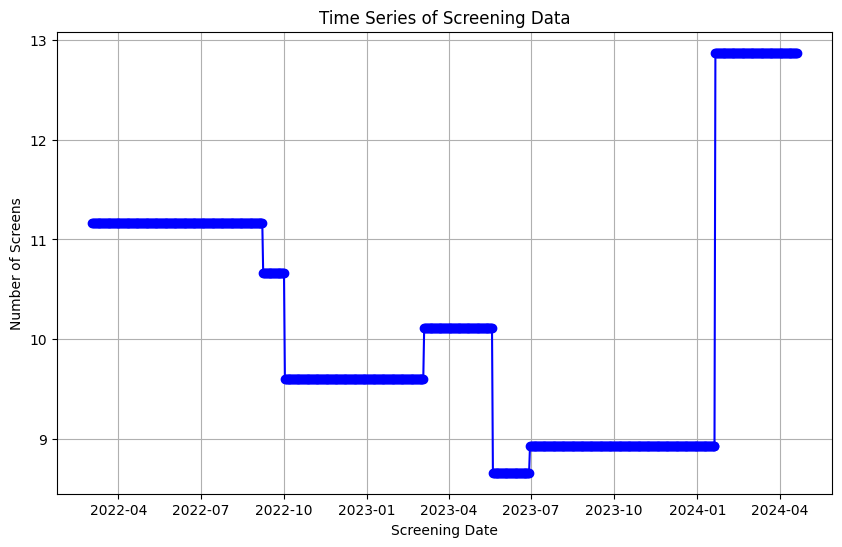

In [11]:
import matplotlib.pyplot as plt # type: ignore

plt.figure(figsize=(10, 6))
plt.plot(d4.index, d4.values, marker='o', linestyle='-', color='b')
plt.title('Time Series of Screening Data')
plt.xlabel('Screening Date')
plt.ylabel('Number of Screens')
plt.grid(True)
plt.show()


In [9]:
d4.to_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/interpolation.xlsx')

In [12]:
# Verifique se o índice é de fato a coluna de datas
d4.index = pd.to_datetime(d4.index)
d4 = d4.asfreq('D')  # Defina a frequência diária


In [13]:
train_size = int(len(d4) * 0.8)
train, test = d4[:train_size], d4[train_size:]

print(train.head())


Screening_date
2022-03-03    11.169861
2022-03-04    11.169861
2022-03-05    11.169861
2022-03-06    11.169861
2022-03-07    11.169861
Freq: D, Name: nscreens, dtype: float64


In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX # type: ignore

# Exemplo de configuração SARIMA
model = SARIMAX(train, 
                order=(1, 1, 1),  # Parâmetros ARIMA (p, d, q)
                seasonal_order=(1, 1, 1, 12),  # Parâmetros sazonais (P, D, Q, m)
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_fit = model.fit(disp=False)

In [16]:
# Previsão para o período de teste
predictions = sarima_fit.forecast(steps=len(test))

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # type: ignore
import numpy as np

mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
r2 = r2_score(test, predictions)
print(f'R²: {r2:.4f}')

MAE: 2.5723727449129012
RMSE: 3.313788357515493
R²: -1.8956


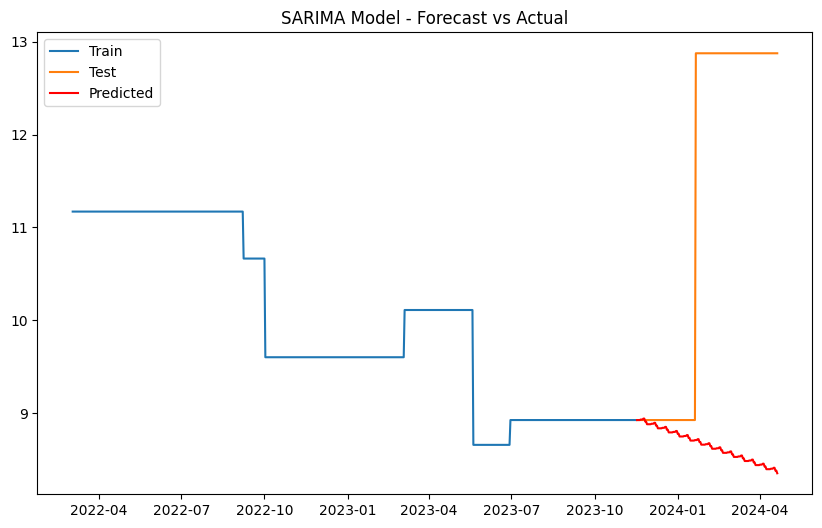

In [18]:
# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('SARIMA Model - Forecast vs Actual')
plt.legend()
plt.show()

Holt-Winters MAE: 2.5659
Holt-Winters RMSE: 3.3069
Holt-Winters R²: -1.8836


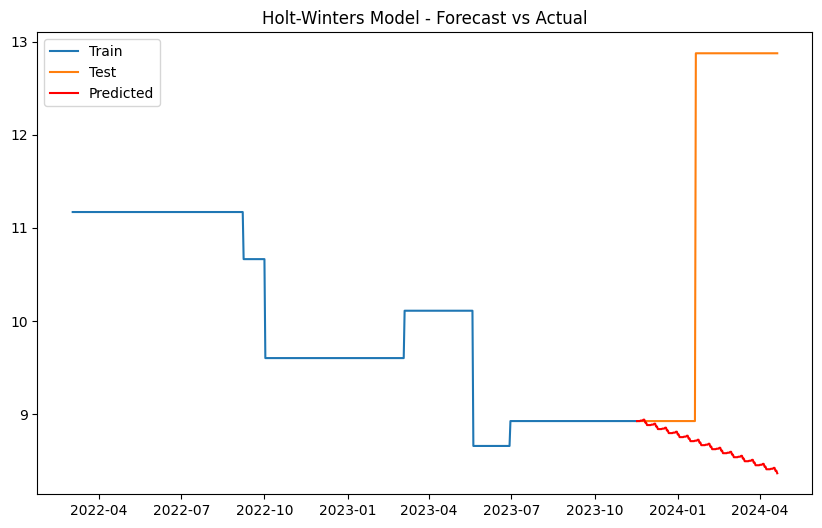

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing # type: ignore

# Ajustar o modelo Holt-Winters
model_hw = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=12)
hw_fit = model_hw.fit()

# Fazer previsões
hw_predictions = hw_fit.forecast(steps=len(test))

# Avaliar o modelo
mae = mean_absolute_error(test, hw_predictions)
rmse = np.sqrt(mean_squared_error(test, hw_predictions))
r2 = r2_score(test, hw_predictions)

print(f'Holt-Winters MAE: {mae:.4f}')
print(f'Holt-Winters RMSE: {rmse:.4f}')
print(f'Holt-Winters R²: {r2:.4f}')

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, hw_predictions, label='Predicted', color='red')
plt.title('Holt-Winters Model - Forecast vs Actual')
plt.legend()
plt.show()

ARIMA MAE: 2.3042
ARIMA RMSE: 3.0169
ARIMA R²: -1.4000


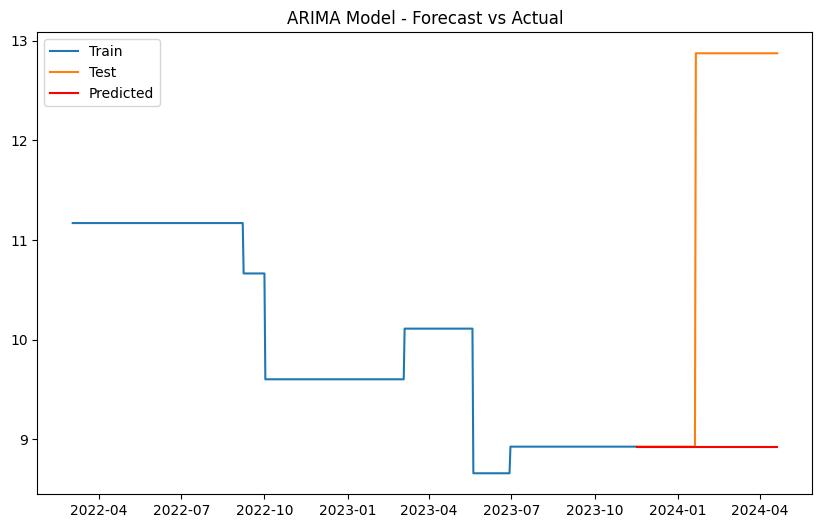

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Como os valores são constantes, o modelo ARIMA pode ser simples
model_arima = ARIMA(train, order=(0, 1, 0))  # ARIMA com d=1 para ver o efeito
arima_fit = model_arima.fit()

# Fazer previsões
arima_predictions = arima_fit.forecast(steps=len(test))

# Avaliar o modelo
mae = mean_absolute_error(test, arima_predictions)
rmse = np.sqrt(mean_squared_error(test, arima_predictions))
r2 = r2_score(test, arima_predictions)

print(f'ARIMA MAE: {mae:.4f}')
print(f'ARIMA RMSE: {rmse:.4f}')
print(f'ARIMA R²: {r2:.4f}')

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, arima_predictions, label='Predicted', color='red')
plt.title('ARIMA Model - Forecast vs Actual')
plt.legend()
plt.show()


In [29]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [55]:
# Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(d4.values.reshape(-1, 1))

# Função para criar sequências de dados
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Definir o tamanho da sequência (por exemplo, 10 dias)
seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# Dividir em conjuntos de treino e teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [56]:
# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0880 - val_loss: 0.0294
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - val_loss: 0.0330
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - val_loss: 0.0163
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8393e-04 - val_loss: 0.0201
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 0.0202
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - val_loss: 0.0190
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0188
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0076e-04 - val_loss: 0.0189
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8529e-04 - val_loss: 0.0186
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2971e-04 - val_loss: 0.0181
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7272e-04 - val_loss: 0.0189
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.001

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
LSTM MAE: 0.1404
LSTM RMSE: 0.5282
LSTM R²: 0.9262


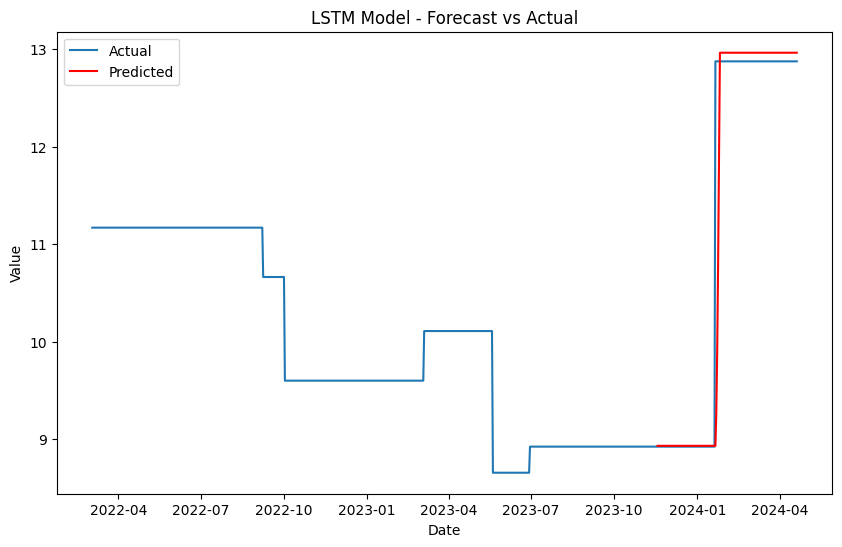

In [57]:
# Fazer previsões no conjunto de teste
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_original = scaler.inverse_transform(y_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test_original, predicted)
rmse = np.sqrt(mean_squared_error(y_test_original, predicted))
r2 = r2_score(y_test_original, predicted)

print(f'LSTM MAE: {mae:.4f}')
print(f'LSTM RMSE: {rmse:.4f}')
print(f'LSTM R²: {r2:.4f}')

# Recuperar as datas associadas ao conjunto de teste
dates_test = d4.index[-len(y_test):]

plt.figure(figsize=(10, 6))
plt.plot(d4.index, d4.values, label='Actual')  # Mostrar todos os valores reais
plt.plot(dates_test, predicted, label='Predicted', color='red')  # Mostrar previsões a partir do ponto disponível
plt.title('LSTM Model - Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

